In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import os
import cv2 as cv

In [2]:
path=r"C:\Users\vidya\Downloads\Tomato\tomato\train"

In [3]:
dis=os.listdir(path)
dis

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [4]:
dis.index("Tomato___Target_Spot")

7

In [5]:
Data=[]
for i in dis:# ALL FOLDERS INSIDE PARENT PATH
    A=os.path.join(path,i) #FOR JOINING PATHS
    for j in os.listdir(A):# FOR GETTING ALL CONTENT FROM FOLDER
        B=os.path.join(A,j)#JOIN
        img=cv.imread(B)#CONVERTING IMAGE TO PIXEL INTENSITY MATRIX
        C=cv.resize(img,(50,50))# RESIZING PIXEL INTENSITY MATRIX
        T=dis.index(i) #FOR GETTING TARGET VARIABLE
        Data.append([C,T]) #TO STORE

In [6]:
i=cv.imread(r"C:\Users\vidya\Downloads\Tomato\tomato\train\Tomato___Tomato_mosaic_virus\5ab64087-b61c-48b9-9db7-5c6ce3eeefcd___PSU_CG 2299.JPG")

In [7]:
i.shape

(256, 256, 3)

In [8]:
Data[1]

[array([[[114, 117, 132],
         [109, 112, 127],
         [101, 104, 119],
         ...,
         [105, 112, 127],
         [108, 115, 130],
         [102, 109, 124]],
 
        [[103, 106, 121],
         [114, 117, 132],
         [109, 112, 127],
         ...,
         [101, 108, 123],
         [111, 118, 133],
         [ 97, 104, 119]],
 
        [[115, 118, 133],
         [107, 110, 125],
         [ 93,  96, 111],
         ...,
         [ 94, 101, 116],
         [ 91,  98, 113],
         [ 97, 104, 119]],
 
        ...,
 
        [[147, 149, 160],
         [149, 151, 162],
         [160, 162, 173],
         ...,
         [153, 157, 168],
         [144, 147, 159],
         [134, 138, 149]],
 
        [[144, 146, 157],
         [139, 141, 152],
         [145, 147, 158],
         ...,
         [151, 155, 166],
         [150, 154, 165],
         [135, 139, 150]],
 
        [[145, 147, 158],
         [146, 147, 159],
         [153, 155, 166],
         ...,
         [147, 151, 162],
  

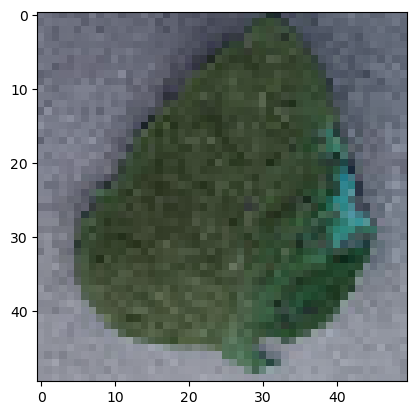

In [9]:
plt.imshow(Data[1][0])

In [10]:
len(Data)

2189

In [11]:
len(Data[1][0])

50

In [12]:
Data[256][1]

1

In [13]:
import random
random.shuffle(Data)

In [14]:
F=[]
T=[]
for i,j in Data:#FOR SEPERATING FEATURES AND TARGETS
    F.append(i)
    T.append(j)

In [15]:
len(F)

2189

In [16]:
T

[5,
 0,
 1,
 2,
 2,
 7,
 1,
 2,
 2,
 1,
 3,
 2,
 7,
 7,
 4,
 8,
 2,
 4,
 0,
 7,
 8,
 5,
 9,
 6,
 3,
 5,
 2,
 5,
 6,
 0,
 2,
 5,
 9,
 3,
 8,
 4,
 0,
 1,
 8,
 9,
 5,
 8,
 5,
 2,
 4,
 0,
 1,
 3,
 1,
 9,
 8,
 4,
 2,
 9,
 2,
 9,
 2,
 3,
 4,
 9,
 5,
 9,
 2,
 3,
 0,
 9,
 7,
 2,
 8,
 1,
 5,
 6,
 3,
 7,
 1,
 2,
 2,
 0,
 4,
 7,
 9,
 8,
 3,
 8,
 6,
 3,
 0,
 2,
 2,
 7,
 5,
 5,
 4,
 3,
 3,
 7,
 3,
 6,
 8,
 1,
 5,
 7,
 8,
 6,
 0,
 9,
 7,
 3,
 4,
 8,
 5,
 5,
 3,
 4,
 6,
 9,
 5,
 4,
 7,
 1,
 8,
 8,
 4,
 5,
 2,
 4,
 7,
 9,
 7,
 5,
 1,
 9,
 8,
 7,
 4,
 3,
 3,
 9,
 1,
 9,
 8,
 2,
 0,
 0,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 0,
 7,
 8,
 1,
 7,
 2,
 6,
 2,
 5,
 1,
 1,
 6,
 0,
 2,
 6,
 8,
 8,
 5,
 2,
 7,
 8,
 3,
 3,
 3,
 4,
 9,
 1,
 9,
 2,
 8,
 1,
 8,
 6,
 8,
 0,
 1,
 4,
 3,
 0,
 0,
 0,
 2,
 6,
 7,
 5,
 3,
 4,
 7,
 4,
 5,
 0,
 8,
 1,
 1,
 7,
 6,
 4,
 7,
 4,
 8,
 8,
 4,
 1,
 5,
 6,
 0,
 0,
 5,
 0,
 1,
 2,
 0,
 9,
 9,
 5,
 0,
 3,
 7,
 4,
 8,
 5,
 1,
 1,
 1,
 3,
 5,
 1,
 8,
 9,
 0,
 8,
 7,
 4,
 2,
 1,
 5,
 4,
 6,
 0,


In [17]:
T1=pd.get_dummies(T).replace({True:1,False:0}) # THESE TARGETS ARE NOMINAL SO GETTING DUMMIES FOR MAINTAING THE IN BETWEEN RELATION WITHOUT AFFECTING THE MODEL
T1

C:\Users\vidya\AppData\Local\Temp\ipykernel_7888\4243940820.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0}) # THESE TARGETS ARE NOMINAL SO GETTING DUMMIES FOR MAINTAING THE IN BETWEEN RELATION WITHOUT AFFECTING THE MODEL


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2184,0,0,1,0,0,0,0,0,0,0
2185,0,0,0,1,0,0,0,0,0,0
2186,0,0,0,0,0,0,0,0,0,1
2187,0,0,0,0,0,0,1,0,0,0


In [18]:
F=np.array(F)#FOR FASTER CALCULATION

In [19]:
F1=F/255 #FOR MINMAX SCALER

In [20]:
F[1]#FIRST IMAGE WITHOUT MINMAX

array([[[138, 141, 139],
        [132, 135, 133],
        [135, 138, 136],
        ...,
        [126, 127, 127],
        [124, 126, 126],
        [128, 130, 130]],

       [[128, 131, 128],
        [134, 137, 135],
        [134, 137, 135],
        ...,
        [125, 127, 127],
        [122, 125, 125],
        [125, 127, 127]],

       [[131, 134, 132],
        [125, 128, 126],
        [138, 141, 139],
        ...,
        [128, 130, 130],
        [125, 127, 127],
        [120, 122, 122]],

       ...,

       [[ 90,  93,  91],
        [ 90,  93,  91],
        [ 90,  93,  91],
        ...,
        [ 77,  77,  77],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 95,  98,  96],
        [ 89,  92,  90],
        [ 97, 100,  98],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 77,  77,  77]],

       [[ 87,  91,  88],
        [ 89,  92,  90],
        [ 96,  99,  97],
        ...,
        [ 82,  82,  82],
        [ 76,  76,  76],
        [ 81,  81,  81]]

In [21]:
F1[1]#FIRST IMAGE AFTER MINMAX

array([[[0.54117647, 0.55294118, 0.54509804],
        [0.51764706, 0.52941176, 0.52156863],
        [0.52941176, 0.54117647, 0.53333333],
        ...,
        [0.49411765, 0.49803922, 0.49803922],
        [0.48627451, 0.49411765, 0.49411765],
        [0.50196078, 0.50980392, 0.50980392]],

       [[0.50196078, 0.51372549, 0.50196078],
        [0.5254902 , 0.5372549 , 0.52941176],
        [0.5254902 , 0.5372549 , 0.52941176],
        ...,
        [0.49019608, 0.49803922, 0.49803922],
        [0.47843137, 0.49019608, 0.49019608],
        [0.49019608, 0.49803922, 0.49803922]],

       [[0.51372549, 0.5254902 , 0.51764706],
        [0.49019608, 0.50196078, 0.49411765],
        [0.54117647, 0.55294118, 0.54509804],
        ...,
        [0.50196078, 0.50980392, 0.50980392],
        [0.49019608, 0.49803922, 0.49803922],
        [0.47058824, 0.47843137, 0.47843137]],

       ...,

       [[0.35294118, 0.36470588, 0.35686275],
        [0.35294118, 0.36470588, 0.35686275],
        [0.35294118, 0

In [22]:
F1.shape#10000 IMAGES HAVING WIDTH OF 150 ,HEIGHT OF 150 AND 3 RGB CHANNEL

(2189, 50, 50, 3)

In [23]:
T1.shape #TARGET VARIABLE SHAPE

(2189, 10)

In [24]:
T=np.array(T)

# MODEL BUILDING

In [26]:
model=Sequential()
#DATA AUGMENTATION
#model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
#model.add(layers.experimental.preprocessing.RandomRotation(0.1))
#model.add(layers.experimental.preprocessing.RandomZoom(0.1))
#model.add(layers.experimental.preprocessing.RandomContrast(0.1))


model.add(  Conv2D(5,   (5,5),  activation='relu')  )#120 IS FILTER COUNT ,(5*5) IS FILTER SIZE
model.add(  MaxPooling2D(  (2,2)  ,strides=(1,1)))#(2*2)IS THE MAXPOOLING MATRIX

model.add(Conv2D(5,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))


model.add(Flatten())

model.add(Dense(3,input_shape=(150,150,3),activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.fit(F1,T, epochs=1, validation_split=0.2, batch_size=2)

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


872/876 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0931 - loss: 0.0000e+00

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (2, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(2, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.0931 - loss: 0.0000e+00 - val_accuracy: 0.1073 - val_loss: 0.0000e+00


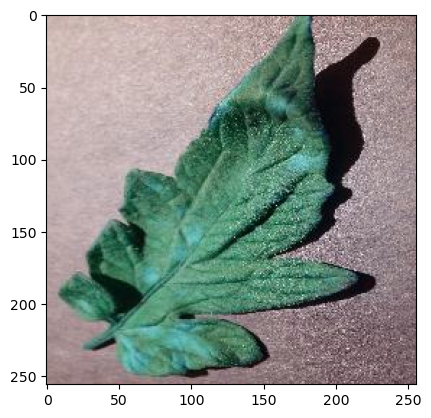

In [28]:
img_path = r"C:\Users\vidya\Downloads\Tomato\tomato\train\Tomato___Leaf_Mold\6a72d24d-5705-4647-8a8c-77d2f268c08a___Crnl_L.Mold 8708.JPG"
img = cv.imread(img_path,)

img_resized = cv.resize(img, (50, 50))
img_resized=img_resized.reshape(1, 50, 50, 3)

plt.imshow(img,)
plt.show()

In [29]:
prediction = model.predict(img_resized)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


array([[1.]], dtype=float32)

In [30]:
dis[1]

'Tomato___Early_blight'

In [31]:
p1=r"C:\Users\vidya\Downloads\Tomato\tomato\val"

In [32]:
Data1=[]
for i in dis:# ALL FOLDERS INSIDE PARENT PATH
    A=os.path.join(p1,i) #FOR JOINING PATHS
    for j in os.listdir(A):# FOR GETTING ALL CONTENT FROM FOLDER
        B=os.path.join(A,j)#JOIN
        img=cv.imread(B)#CONVERTING IMAGE TO PIXEL INTENSITY MATRIX
        C=cv.resize(img,(50,50))# RESIZING PIXEL INTENSITY MATRIX
        T=dis.index(i) #FOR GETTING TARGET VARIABLE
        Data1.append([C,T]) #TO STORE

In [33]:
import random
random.shuffle(Data1)

In [34]:
Data1[1]

[array([[[ 81,  81,  87],
         [ 84,  84,  90],
         [ 87,  87,  93],
         ...,
         [110, 106, 111],
         [117, 113, 118],
         [113, 109, 114]],
 
        [[ 69,  69,  75],
         [ 86,  86,  92],
         [ 79,  79,  85],
         ...,
         [ 92,  88,  93],
         [108, 104, 109],
         [119, 115, 120]],
 
        [[ 81,  81,  87],
         [ 83,  83,  89],
         [ 83,  83,  88],
         ...,
         [118, 114, 119],
         [117, 113, 118],
         [127, 123, 128]],
 
        ...,
 
        [[ 95,  93,  92],
         [ 95,  93,  92],
         [ 98,  96,  95],
         ...,
         [117, 115, 115],
         [117, 115, 115],
         [118, 117, 117]],
 
        [[ 94,  92,  91],
         [ 97,  95,  94],
         [ 93,  91,  90],
         ...,
         [116, 114, 114],
         [116, 114, 114],
         [116, 114, 114]],
 
        [[ 94,  92,  91],
         [ 87,  85,  84],
         [ 89,  87,  86],
         ...,
         [119, 116, 116],
  

In [35]:
F1=[]
T1=[]
for i,j in Data1:
    F1.append(i)
    T1.append(j)

In [36]:
T1

[5,
 3,
 9,
 3,
 8,
 7,
 3,
 2,
 5,
 1,
 2,
 3,
 2,
 7,
 8,
 3,
 3,
 1,
 8,
 1,
 2,
 9,
 4,
 9,
 5,
 6,
 2,
 6,
 5,
 1,
 5,
 4,
 7,
 1,
 1,
 9,
 8,
 2,
 9,
 5,
 0,
 4,
 0,
 2,
 1,
 0,
 3,
 8,
 0,
 0,
 9,
 2,
 5,
 5,
 0,
 6,
 7,
 5,
 9,
 8,
 5,
 9,
 3,
 1,
 0,
 1,
 2,
 8,
 9,
 8,
 0,
 7,
 0,
 0,
 4,
 2,
 5,
 2,
 9,
 4,
 9,
 9,
 4,
 4,
 2,
 8,
 7,
 4,
 7,
 6,
 6,
 5,
 3,
 4,
 5,
 6,
 9,
 4,
 7,
 3,
 1,
 9,
 6,
 7,
 0,
 6,
 6,
 2,
 9,
 3,
 0,
 9,
 8,
 8,
 1,
 3,
 6,
 8,
 1,
 1,
 8,
 0,
 0,
 3,
 6,
 5,
 2,
 4,
 9,
 9,
 1,
 9,
 5,
 1,
 8,
 3,
 7,
 9,
 1,
 9,
 2,
 2,
 8,
 9,
 9,
 4,
 2,
 2,
 6,
 6,
 6,
 6,
 9,
 3,
 8,
 8,
 1,
 7,
 1,
 3,
 4,
 5,
 2,
 7,
 8,
 5,
 4,
 6,
 2,
 2,
 4,
 7,
 9,
 9,
 4,
 2,
 6,
 5,
 9,
 1,
 9,
 2,
 9,
 5,
 6,
 7,
 4,
 9,
 0,
 3,
 4,
 2,
 0,
 5,
 3,
 2,
 3,
 5,
 5,
 7,
 2,
 8,
 2,
 4,
 8,
 0,
 5,
 5,
 5,
 3,
 6,
 0,
 2,
 2,
 1,
 7,
 6,
 2,
 6,
 4,
 7,
 8,
 5,
 1,
 4,
 6,
 1,
 8,
 5,
 3,
 1,
 6,
 3,
 1,
 7,
 8,
 8,
 4,
 9,
 5,
 3,
 8,
 9,
 4,
 9,
 7,
 0,
 5,
 2,
 1,


In [37]:
F1=np.array(F1)
F1=F1/255  # for minmax scaler

In [38]:
pred=model.predict(F1)
pred

 5/32 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [40]:
print(confusion_matrix(T1,pred))

[[  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]]


In [41]:
print(classification_report(T1,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.10      1.00      0.18       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100

    accuracy                           0.10      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.10      0.02      1000



C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
accuracy_score(T1,pred)*100

10.0